<a href="https://colab.research.google.com/github/wmalevich/ds_course/blob/main/hw_3(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data

In [ ]:
data = get_data('spx')

,year,month,text,PX_LAST
0,2019,9,To show you how dishonest the LameStream Media...,2961.79
1,2019,9,RT @realDonaldTrump: Sooooo true @LindseyGraha...,2977.62
2,2019,9,Great new book by the brilliant Andrew McCarth...,2984.87
3,2019,9,True. A wonderful meeting! https://t.co/W9ByXa...,2966.60
4,2019,9,“The very thing that they are accusing Preside...,2991.78


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление пунктуации и специальных символов
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация
    tokens = word_tokenize(text)

    # Удаление стоп-слов
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Применение функции preprocess_text к столбцу 'text'
data['text'] = data['text'].apply(preprocess_text)

print(data)

     year  month                                               text  PX_LAST
0    2019      9  show dishonest lamestream medium used word lid...  2961.79
1    2019      9  rt realdonaldtrump sooooo true lindseygrahamsc...  2977.62
2    2019      9  great new book brilliant andrew mccarthy ball ...  2984.87
3    2019      9  true wonderful meeting httpstcow9byxas8qfrt cs...  2966.60
4    2019      9  thing accusing president trump didnt actually ...  2991.78
..    ...    ...                                                ...      ...
869  2016      1  hank greenberg formerly aig gave 10 million je...  1922.03
870  2016      1  failing unionleader newspaper nh sent trump or...  1943.09
871  2016      1  germany going massive attack people migrant al...  1990.26
872  2016      1  wow unionleader circulation nh dropped 75000 a...  2016.71
873  2016      1  rhettriley1234 trump win vote must grow trump ...  2012.66

[874 rows x 4 columns]


          Word  Frequency
472      great       1734
593        amp       1365
77      people        882
40       trump        826
55   president        799
212          u        758
156    country        714
62    democrat        646
473      state        609
966        job        591


<Figure size 1000x600 with 0 Axes>

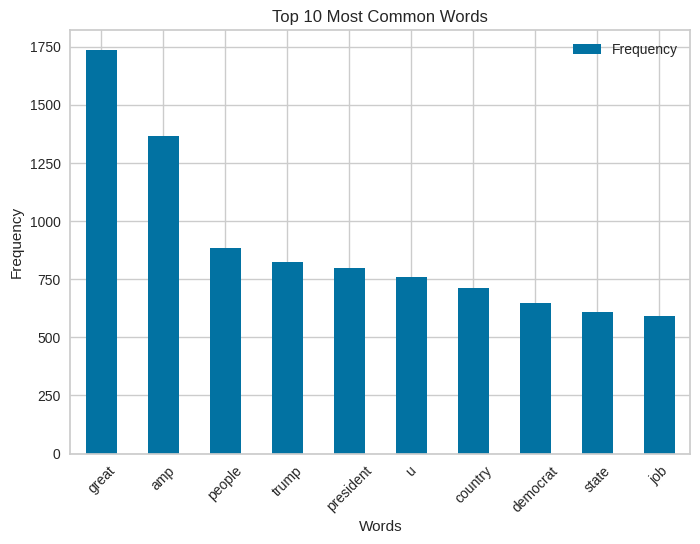

In [ ]:
# Вывод топ-10 самых популярных слов

import matplotlib.pyplot as plt
import pandas as pd

all_text = ' '.join(data['text'])

tokens = word_tokenize(all_text)

word_freq = nltk.FreqDist(tokens)

word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df.head(10))

plt.figure(figsize=(10, 6))
word_freq_df.head(10).plot(kind='bar', x='Word', y='Frequency')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текста с использованием tf-idf
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

print("Размер матрицы TF-IDF:", tfidf_matrix.shape)

Размер матрицы TF-IDF: (874, 21888)


In [ ]:
# Создание нового DataFrame с векторизованными данными
vectorized_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data.index)
vectorized_df.head()

,03,04,09,0senator,0source,10,100,1000,10000,100000,...,zoomapple,zte,zucker,zuckerberg,zuckerman,zuckermans,zuker,élysée,órdenes,último
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.concat([data, vectorized_df], axis = 1)
print(data.shape)
data.head()

(874, 21892)


,year,month,text,PX_LAST,03,04,09,0senator,0source,10,...,zoomapple,zte,zucker,zuckerberg,zuckerman,zuckermans,zuker,élysée,órdenes,último
0,2019,9,show dishonest lamestream medium used word lid...,2961.79,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,9,rt realdonaldtrump sooooo true lindseygrahamsc...,2977.62,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,9,great new book brilliant andrew mccarthy ball ...,2984.87,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,9,true wonderful meeting httpstcow9byxas8qfrt cs...,2966.60,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,9,thing accusing president trump didnt actually ...,2991.78,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd

# Сохраняем целевую переменную
target_column = data['PX_LAST']

# Заменяем имена всех столбцов, кроме целевого, на числа (из-за дублирования имен)
data = data.drop(columns=['PX_LAST', 'text'])
data.columns = range(len(data.columns))

# Возвращаем целевую переменную в DataFrame
data['PX_LAST'] = target_column

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,21880,21881,21882,21883,21884,21885,21886,21887,21888,PX_LAST
0,2019,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2961.79
1,2019,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2977.62
2,2019,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2984.87
3,2019,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2966.60
4,2019,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2991.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,2016,1,0.0,0.0,0.0,0.0,0.0,0.094806,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922.03
870,2016,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1943.09
871,2016,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990.26
872,2016,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.71


In [ ]:
from pycaret.regression import *
s = setup(data, target = 'PX_LAST', session_id = 123)

,Description,Value
0,Session id,123
1,Target,PX_LAST
2,Target type,Regression
3,Original data shape,"(874, 21890)"
4,Transformed data shape,"(874, 21890)"
5,Transformed train set shape,"(611, 21890)"
6,Transformed test set shape,"(263, 21890)"
7,Numeric features,21889
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,26.5920,1841.2964,40.9343,0.9799,0.0159,0.0104,1.2990
et,Extra Trees Regressor,30.0880,1987.9642,43.8503,0.9779,0.0170,0.0118,47.1490
rf,Random Forest Regressor,31.6778,2082.3672,44.6826,0.9769,0.0172,0.0123,28.8520
gbr,Gradient Boosting Regressor,34.7412,2345.9117,47.7760,0.9739,0.0183,0.0135,13.0290
xgboost,Extreme Gradient Boosting,34.2479,2464.0549,48.5472,0.9725,0.0185,0.0133,22.7670
lightgbm,Light Gradient Boosting Machine,38.7936,3061.4930,54.4316,0.9657,0.0208,0.0151,3.2690
dt,Decision Tree Regressor,38.0240,3463.8801,57.0703,0.9615,0.0218,0.0147,1.5280
ada,AdaBoost Regressor,51.0255,4601.5832,67.5430,0.9500,0.0258,0.0198,25.4040
ridge,Ridge Regression,58.9668,7050.7397,82.7303,0.9218,0.0317,0.0230,1.4780
lr,Linear Regression,63.2909,7483.5079,85.3204,0.9175,0.0328,0.0248,4.3490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,26.4636,1735.9066,41.6642,0.9822,0.0163,0.0105


,0,1,2,3,4,5,6,7,8,9,...,21881,21882,21883,21884,21885,21886,21887,21888,PX_LAST,prediction_label
372,2018,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2662.840088,2635.495850
517,2017,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2471.649902,2452.239990
791,2016,5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2063.370117,2075.159912
145,2019,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2792.810059,2801.612061
151,2019,2,0.0,0.0,0.0,0.0,0.0,0.101708,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2792.669922,2748.947998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2018,3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2643.689941,2721.864014
701,2016,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.148413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2127.810059,2161.072266
619,2017,4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2352.949951,2354.844238
263,2018,9,0.0,0.0,0.0,0.0,0.0,0.000000,0.034189,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2877.129883,2900.832031


In [ ]:
# Использование встроенного в setup() метод эмбеддинга

In [ ]:
data = get_data('spx')

,year,month,text,PX_LAST
0,2019,9,To show you how dishonest the LameStream Media...,2961.79
1,2019,9,RT @realDonaldTrump: Sooooo true @LindseyGraha...,2977.62
2,2019,9,Great new book by the brilliant Andrew McCarth...,2984.87
3,2019,9,True. A wonderful meeting! https://t.co/W9ByXa...,2966.60
4,2019,9,“The very thing that they are accusing Preside...,2991.78


In [ ]:
from pycaret.regression import *
s = setup(data, text_features=['text'], target='PX_LAST', session_id=123)

,Description,Value
0,Session id,123
1,Target,PX_LAST
2,Target type,Regression
3,Original data shape,"(874, 4)"
4,Transformed data shape,"(874, 13906)"
5,Transformed train set shape,"(611, 13906)"
6,Transformed test set shape,"(263, 13906)"
7,Numeric features,2
8,Text features,1
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,27.4405,1937.9983,42.2574,0.9788,0.0164,0.0107,1.0190
et,Extra Trees Regressor,30.2585,1915.1522,43.1443,0.9787,0.0167,0.0119,38.1850
rf,Random Forest Regressor,32.7362,2098.3173,45.1047,0.9768,0.0173,0.0127,24.7040
xgboost,Extreme Gradient Boosting,34.0697,2313.2613,47.5681,0.9744,0.0182,0.0132,16.0260
gbr,Gradient Boosting Regressor,34.9673,2461.0120,49.0896,0.9728,0.0188,0.0136,11.1750
dt,Decision Tree Regressor,35.8283,2756.6991,51.7158,0.9703,0.0202,0.0141,1.3340
lightgbm,Light Gradient Boosting Machine,38.7472,2948.0419,53.6233,0.9673,0.0205,0.0150,6.0680
ada,AdaBoost Regressor,50.5043,4671.6653,67.8820,0.9489,0.0258,0.0195,15.9410
br,Bayesian Ridge,58.0169,6189.0790,77.7476,0.9315,0.0299,0.0227,10.4630
lr,Linear Regression,58.3876,6239.3572,78.0310,0.9310,0.0302,0.0229,3.0080


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,28.2482,1931.4799,43.9486,0.9802,0.0173,0.0112


,year,month,text,PX_LAST,prediction_label
372,2018,4,The Caravan is largely broken up thanks to the...,2662.840088,2641.513916
517,2017,8,RT @FoxNews: .@KellyannePolls on Harvey recove...,2471.649902,2457.823975
791,2016,5,MAKE AMERICA GREAT AGAIN!#INPrimary #VoteTrump...,2063.370117,2087.437988
145,2019,3,FEMA has been told directly by me to give the ...,2792.810059,2819.585938
151,2019,2,Highly respected Senator Richard Burr head of ...,2792.669922,2741.078125
...,...,...,...,...,...
381,2018,3,Crazy Joe Biden is trying to act like a tough ...,2643.689941,2717.592285
701,2016,9,The documentary of me that @CNN just aired is ...,2127.810059,2169.148193
619,2017,4,I am deeply committed to preserving our strong...,2352.949951,2358.173828
263,2018,9,The GDP Rate (4.2%) is higher than the Unemplo...,2877.129883,2900.832031


In [ ]:
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'month'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('text_embedding',
                  TransformerWrapper(include=['text'],
                                     transformer=EmbedTextFeatures())),
                 ('trained_model', KNeighborsRegressor(n_jobs=-1))]),
 'best_pipeline.pkl')

In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
import mlflow
import mlflow.pyfunc

with mlflow.start_run(run_name="spx"):
  mlflow.log_param("model_name", "k-nn")
  mlflow.log_artifact('best_pipeline.pkl')
  mlflow.log_metric("MAE", 28.2482)
  mlflow.log_metric("MSE", 1931.4799)
  mlflow.log_metric("RMSE", 43.9486)
  mlflow.log_metric("R2", 0.9802)
  mlflow.log_metric("RMSLE", 0.0173)
  mlflow.log_metric("MAPE", 0.0112)

get_ipython().system_raw("mlflow ui --port 5000 &")

In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.kill()

In [ ]:
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://682c-34-126-114-3.ngrok-free.app
